In [73]:
%run "1.1-drac-data.ipynb"
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import portafilio_profesional.features.build_features as features

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Top 5 estados de México con más accidentes

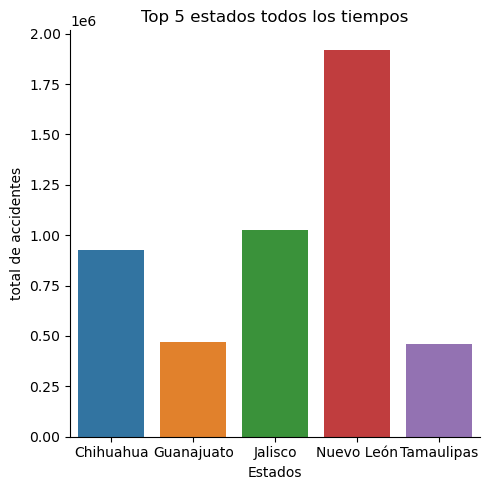

In [5]:
df_top_5, etiquetas_x=features.top_5(df=df_atus_ligero,tc=tc_entidad)
sns.catplot(data=df_top_5, x='ID_ENTIDAD', kind='count')
plt.xticks(np.arange(5),etiquetas_x)
plt.title('Top 5 estados todos los tiempos')
plt.xlabel('Estados')
plt.ylabel('total de accidentes')
plt.tight_layout()
plt.show()

### Top 5 estados por cada año

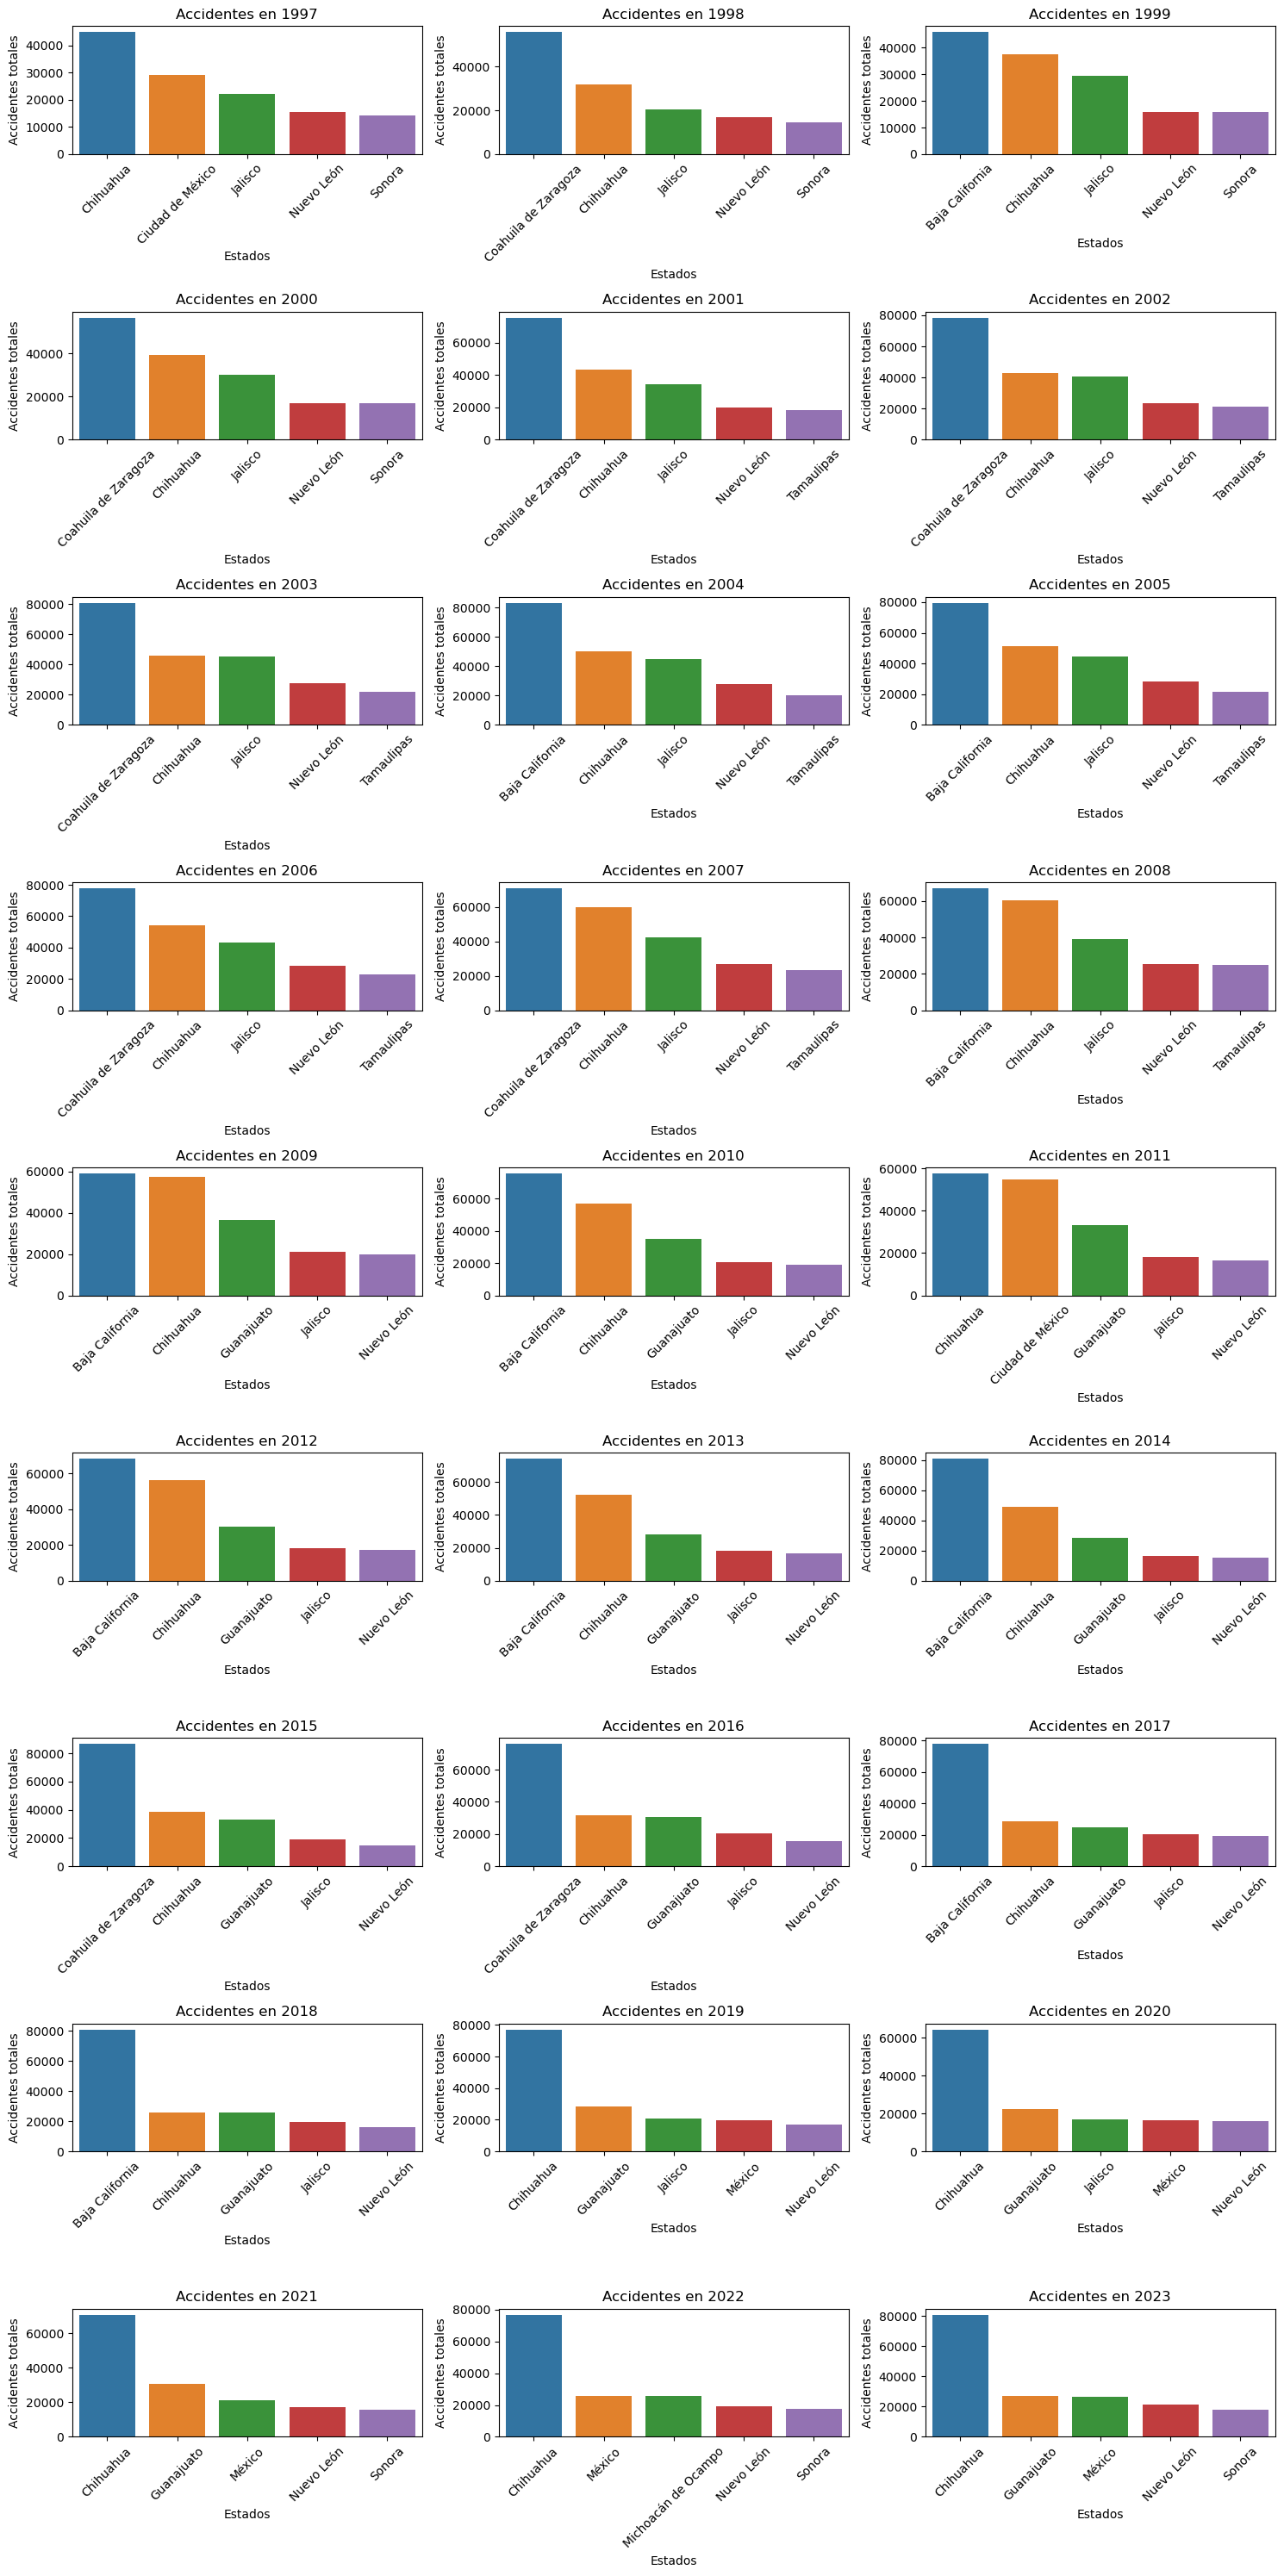

In [70]:
fig, axes = plt.subplots(9,3, figsize=(15,30))
top_5_todos_anios = []
for idx, anio in enumerate(range(1997, 2024)):
    ax = axes[idx // 3, idx % 3]
    df = df_atus_ligero[df_atus_ligero['ANIO']==anio]
    df_top_5, etiquetas_x=features.top_5(df=df,tc=tc_entidad,colum='ID_ENTIDAD',tc_name='NOM_ENTIDAD',tc_option=True)
    top_5_todos_anios.append(etiquetas_x)
    sns.countplot(data=df_top_5, x='ID_ENTIDAD', ax=ax, order=df_top_5['ID_ENTIDAD'].value_counts().head(5).index)
    
    ax.set_title(f'Accidentes en {anio}')
    ax.set_xlabel('Estados')
    ax.set_ylabel('Accidentes totales')
    ax.set_xticklabels(etiquetas_x, rotation=45)

# Ajustar el diseño
plt.tight_layout()
plt.show()

Es sorprendente como Nuevo León ha sido el estado con más accidentes en todos los tiempos, pero nunca ha sido el estado con más accidentes en el año.


## Top 5 del top 5

In [54]:
df = pd.DataFrame(top_5_todos_anios, columns=['Primero','Segundo','Tercero','Cuarto','Quinto'])

In [55]:
for i in ['Primero','Segundo','Tercero','Cuarto','Quinto']:
    estado = df[i].value_counts().head(1).index[0]
    print('El',i,'es: \n',estado)

El Primero es: 
 Baja California
El Segundo es: 
 Chihuahua
El Tercero es: 
 Jalisco
El Cuarto es: 
 Nuevo León
El Quinto es: 
 Nuevo León


## Top 5 días del año con más accidentes

In [76]:
df_top_5, etiquetas_x =features.top_5(df=df_enriquecido,tc=tc_entidad,colum='MES_DIA',tc_name='NOM_ENTIDAD')

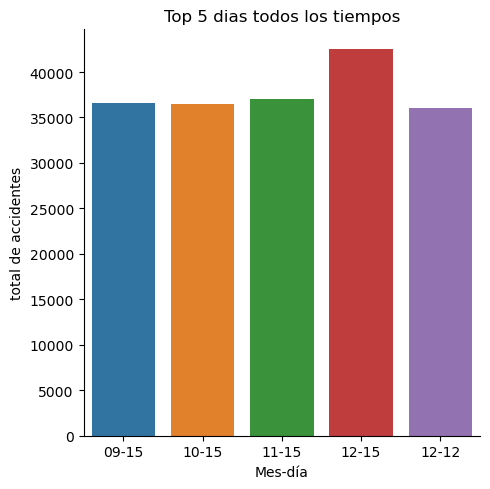

In [82]:
df_top_5, etiquetas_x =features.top_5(df=df_enriquecido,colum='MES_DIA')
sns.catplot(data=df_top_5, x='MES_DIA', kind='count')
#plt.xticks(np.arange(5),etiquetas_x)
plt.title('Top 5 dias todos los tiempos')
plt.xlabel('Mes-día')
plt.ylabel('total de accidentes')
plt.tight_layout()
plt.show()

In [64]:
df_enriquecido['MES_DIA'].value_counts().head(5).index

Index(['12-15', '11-15', '09-15', '10-15', '12-12'], dtype='object')

In [ ]:
df_enriquecido['SEMANA'].value_counts().head